# Analyzing Russian Troll Tweets

In [319]:
# Loading pandas
import pandas as pd, nltk, wordcloud, numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob


nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/sclayton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sclayton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sclayton/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [387]:
#Loading in our csv file
data = pd.read_csv("2016_election_tweets.csv", index_col="id")


## Exploring the Data

In [388]:
data

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
id,,,,,,,,,,,,,,,
1,1.652139e+09,ACEJINEV,I'm so sick of you motherfuckas...,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2018,RETWEET,left,0,1,LeftTroll
2,1.652139e+09,ACEJINEV,Congrats �. RT @PURLYWYTE: I am so in love wit...,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2017,RETWEET,left,0,1,LeftTroll
3,1.652139e+09,ACEJINEV,Now Playing: Wiz Khalifa - Stranger Things Fea...,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2019,RETWEET,left,0,1,LeftTroll
4,1.652139e+09,ACEJINEV,".@GSlutkin is visiting us in Zurich this week,...",United States,English,11/8/16 15:00,11/8/16 15:02,801,904,2015,RETWEET,left,0,1,LeftTroll
5,1.652139e+09,ACEJINEV,Could we be getting a new Childish Gambino alb...,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2020,RETWEET,left,0,1,LeftTroll
6,1.652139e+09,ACEJINEV,9.0 Magazine @9ptohmag Issue 7 features Crakk ...,United States,English,11/8/16 21:01,11/8/16 21:02,801,903,2026,RETWEET,left,0,1,LeftTroll
7,1.652139e+09,ACEJINEV,"""I'm on my Robin Thicke shit / Shit ever gets ...",United States,English,11/8/16 21:01,11/8/16 21:01,801,903,2024,RETWEET,left,0,1,LeftTroll
8,1.652139e+09,ACEJINEV,Early numbers show record-breaking early votin...,United States,English,11/8/16 21:01,11/8/16 21:03,801,903,2022,RETWEET,left,0,1,LeftTroll
9,1.652139e+09,ACEJINEV,Everything we’ve worked toward comes down to t...,United States,English,11/8/16 21:01,11/8/16 21:01,801,903,2021,RETWEET,left,0,1,LeftTroll


In [389]:
#How many words are in each tweet
data["word_count"] = data["content"].apply(lambda x: len(str(x).split(" ")))
data[['content', 'word_count']].sort_values(by = "word_count", ascending = False).head(10)

,content,word_count
id,,
3242,In darkness. I n d a r k n ...,121
13434,In 2018 Dems must defend a whopping 10 senate ...,36
5798,'@DanScavino F L O R I D A F O R T R ...,35
1163,#ThingsPeopleOnTwitterLike 1. Full anonymi...,34
4361,#ThingsPeopleOnTwitterLike 1. Full anonymi...,34
773,#ThingsPeopleOnTwitterLike 1. Full anonymi...,34
2407,#ThingsPeopleOnTwitterLike 1. Full anonymi...,34
893,#ThingsPeopleOnTwitterLike 1. Full anonymi...,34
7996,"1st 20 gms 13-14 - 36.5 mpg, 29% USG, 18 fga/g...",33


In [390]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

data['avg_word'] = data['content'].apply(lambda x: avg_word(x))
data[['content', 'avg_word']].sort_values(by="avg_word", ascending = False).head(10)

,content,avg_word
id,,
13733,'@TEN_GOP ������������������������������������...,59.000000
13734,'@TEN_GOP ������������������������������������...,59.000000
7451,Yo!!!!!!!!!!!!!!!!!!!!! ☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠☠...,24.666667
7402,#CelebrityEndorsementEnvy https://t.co/z9RGDbp3F7,24.000000
9996,https://t.co/1DhQCodpIi,23.000000
341,https://t.co/BEwR8SdOvQ,23.000000
7564,https://t.co/NAwLrJwNif,23.000000
1311,https://t.co/gAAIjCWYa3,23.000000
9997,https://t.co/1DhQCodpIi,23.000000


In [391]:
data['hashtags'] = data['content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['content', 'hashtags']].sort_values(by="hashtags", ascending = False).head(10)

,content,hashtags
id,,
6356,ThinkBefore!�� #AZ #OHIO #NorthCarolina #Wisco...,17
14047,#Raleigh #VirginiaBeach #Madison #PHoenix #Ari...,17
14026,#Omaha #Kansas #Topeka #Charleston #Orlando #D...,17
7429,"We Must Stop #Hillary, Our #Freedoms are at St...",15
2919,#VoteTrump for a BETTER LIFE! #DonaldTrump #NB...,12
1779,#VoteTrump for a BETTER LIFE! #DonaldTrump #NB...,12
2625,#rainoffrogs #praiseKek #HillaryForPrison2016 ...,12
5275,#USA #USA2016 #Trump #HillaryClinton #Trump...,12
532,#rainoffrogs #praiseKek #HillaryForPrison2016 ...,12


### Challenge question! 

How could you create a count of twitter usernames in each tweet? 

Use the cell below for your answer. 

## Cleaning Data

In [392]:
# Making all lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['content'].head(20)

id
1                    i'm so sick of you motherfuckas...
2     congrats �. rt @purlywyte: i am so in love wit...
3     now playing: wiz khalifa - stranger things fea...
4     .@gslutkin is visiting us in zurich this week,...
5     could we be getting a new childish gambino alb...
6     9.0 magazine @9ptohmag issue 7 features crakk ...
7     "i'm on my robin thicke shit / shit ever gets ...
8     early numbers show record-breaking early votin...
9     everything we’ve worked toward comes down to t...
10    lea robinson - down in my dm freestyle https:/...
11    now playing: dej loaf - beef n broccoli -> htt...
12                             life is about balance ⚖️
13    check it out! petra haden & jesse harris at @j...
14    #nowplaying bebe rexha - no broken hearts (fea...
15    submit to our original song contest!!! your ch...
16    never know who you might see this episode #gut...
17    now playing: ty dolla $ign - where feat. migos...
18    for all of @jaylyriq850 music news and 

In [393]:
#Removing usernames

data['content'] = data['content'].str.replace('\@[\w\s+]*'," ")
data['content'].head(20)

id
1                    i'm so sick of you motherfuckas...
2     congrats �. rt  : i am so in love with my son ...
3     now playing: wiz khalifa - stranger things fea...
4        . , talking about the work  ://t.co/qihegdqvsw
5     could we be getting a new childish gambino alb...
6              9.0 magazine   . https://t.co/h1xdrxpinn
7     "i'm on my robin thicke shit / shit ever gets ...
8     early numbers show record-breaking early votin...
9     everything we’ve worked toward comes down to t...
10    lea robinson - down in my dm freestyle https:/...
11    now playing: dej loaf - beef n broccoli -> htt...
12                             life is about balance ⚖️
13    check it out! petra haden & jesse harris at  /...
14    #nowplaying bebe rexha - no broken hearts (fea...
15    submit to our original song contest!!! your ch...
16    never know who you might see this episode #gut...
17    now playing: ty dolla $ign - where feat. migos...
18                                        for

In [394]:
#Removing links

data['content'] = data['content'].str.replace('http[\S\w\s+]*'," ")
data['content'] = data['content'].str.replace('://[\S\w\s+]*'," ")

data['content'].head(20)




id
1                    i'm so sick of you motherfuckas...
2     congrats �. rt  : i am so in love with my son �  
3     now playing: wiz khalifa - stranger things fea...
4                         . , talking about the work   
5     could we be getting a new childish gambino alb...
6                                    9.0 magazine   .  
7     "i'm on my robin thicke shit / shit ever gets ...
8     early numbers show record-breaking early votin...
9     everything we’ve worked toward comes down to t...
10             lea robinson - down in my dm freestyle  
11         now playing: dej loaf - beef n broccoli ->  
12                             life is about balance ⚖️
13    check it out! petra haden & jesse harris at  /...
14    #nowplaying bebe rexha - no broken hearts (fea...
15    submit to our original song contest!!! your ch...
16    never know who you might see this episode #gut...
17    now playing: ty dolla $ign - where feat. migos...
18                                        for

In [395]:
#Removing puncuation
data['content'] = data['content'].str.replace('[^\w\s*]'," ")
data['content'].head(10)

id
1                    i m so sick of you motherfuckas   
2     congrats    rt    i am so in love with my son    
3     now playing  wiz khalifa   stranger things fea...
4                             talking about the work   
5     could we be getting a new childish gambino alb...
6                                    9 0 magazine      
7      i m on my robin thicke shit   shit ever gets ...
8     early numbers show record breaking early votin...
9     everything we ve worked toward comes down to t...
10             lea robinson   down in my dm freestyle  
Name: content, dtype: object

In [396]:
#Removing stopwords
stop = nltk.corpus.stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['content'].head(10)

id
1                                     sick motherfuckas
2                                  congrats rt love son
3     playing wiz khalifa stranger things feat j r d...
4                                          talking work
5     could getting new childish gambino album next ...
6                                          9 0 magazine
7     robin thicke shit shit ever gets thick back ro...
8     early numbers show record breaking early votin...
9     everything worked toward comes today rt voting...
10                            lea robinson dm freestyle
Name: content, dtype: object

In [397]:
#Lemmatize strings
wnl = nltk.stem.WordNetLemmatizer()

#Need to do for different parts of speech
data['content'] = data['content'].apply(lambda x: " ".join([wnl.lemmatize(x) for x in x.split()]))
data['content'] = data['content'].apply(lambda x: " ".join([wnl.lemmatize(x, 'v') for x in x.split()]))


data['content'].head(20)

id
1                                     sick motherfuckas
2                                  congrats rt love son
3       play wiz khalifa stranger thing feat j r donato
4                                             talk work
5       could get new childish gambino album next month
6                                          9 0 magazine
7     robin thicke shit shit ever get thick back rob...
8     early number show record break early vote turn...
9     everything work toward come today rt vote hillary
10                            lea robinson dm freestyle
11                        play dej loaf beef n broccoli
12                                         life balance
13               check petra haden jesse harris 05 2016
14    nowplaying bebe rexha break heart feat nicki m...
15    submit original song contest chance win major ...
16    never know might see episode gutterlife coregr...
17                         play ty dolla ign feat migos
18                                           

In [398]:
top_freq = pd.Series(' '.join(data['content']).split()).value_counts()[:50]
top_freq

trump                        1998
vote                         1900
trumpforpresident            1163
hillary                       866
icelebratetrumpwith           847
get                           828
2016electionin3words          668
electionday                   665
election                      630
clinton                       628
maga                          624
go                            601
u                             580
america                       566
hillaryforprison2016          552
people                        548
win                           493
make                          463
day                           429
like                          429
one                           418
poll                          413
time                          383
thingspeopleontwitterlike     377
trumppence16                  377
voter                         364
2                             362
1                             360
say                           357
today         

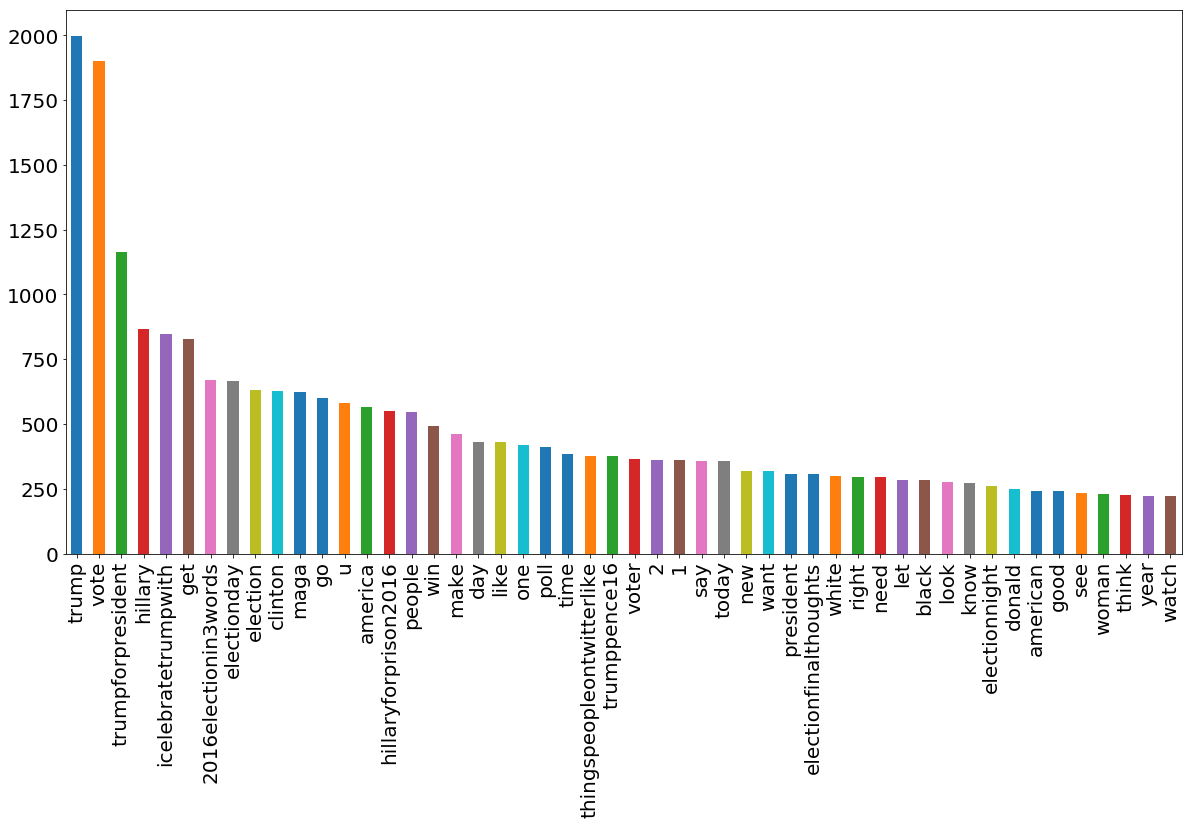

In [399]:
top_freq.plot(kind="bar", figsize=(20,10), fontsize=20)

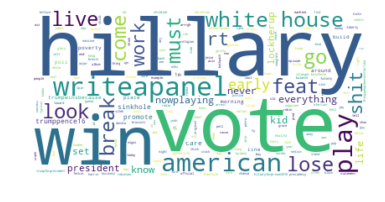

In [400]:
text = str(data["content"][:])
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white", relative_scaling=.2).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [401]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


for tweet in data["content"]:
    print(tweet)
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
    print()
    

sick motherfuckas
compound: -0.5106, neg: 0.767, neu: 0.233, pos: 0.0, 
congrats rt love son
compound: 0.8225, neg: 0.0, neu: 0.208, pos: 0.792, 
play wiz khalifa stranger thing feat j r donato
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
talk work
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
could get new childish gambino album next month
compound: -0.296, neg: 0.239, neu: 0.761, pos: 0.0, 
9 0 magazine
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
robin thicke shit shit ever get thick back rob niggaz quick brooklyn
compound: -0.8957, neg: 0.545, neu: 0.455, pos: 0.0, 
early number show record break early vote turnout particularly among latino state electionday
compound: 0.0772, neg: 0.0, neu: 0.902, pos: 0.098, 
everything work toward come today rt vote hillary
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
lea robinson dm freestyle
compound: 0.1779, neg: 0.0, neu: 0.638, pos: 0.362, 
play dej loaf beef n broccoli
compound: 0.34, neg: 0.0, neu: 0.625, pos: 0.375, 
life balance


compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
jeff session obama must 8216 make crystal clear 8217 citizen vote u election
compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
conestoga twp set possibly biggest voter turnout 40 year accord judge election lancastervotes
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
problem
compound: -0.4019, neg: 1.0, neu: 0.0, pos: 0.0, 
pres obama relax golf party sleep enjoy frivolous travel still 75 day leave presidency
compound: 0.8225, neg: 0.06, neu: 0.5, pos: 0.44, 
state department need 5 year review hillary email jam comey claim 5 day somebody lyin u big time
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
previous dem finally start see light move trump 1000 tire play
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
nypd fbi indict go public find hillary dc child sex ring
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
neverhillary election rep v dem corruption v maga election2016 votetrump electionfinalthoughts
compound: 0.0, neg: 0.0, n

thingspeopleontwitterlike alot gif talk peanut butter
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
thingspeopleontwitterlike limit 140 character dm
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
validation via like rt self important ok thingspeopleontwitterlike
compound: 0.6705, neg: 0.0, neu: 0.435, pos: 0.565, 
difficult impossible conduct strictly honest business mahatma gandhi
compound: 0.2023, neg: 0.212, neu: 0.508, pos: 0.28, 
political hashtags electionday
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ifiwontheelection would huge disaster bigly nevertrump imwither election2016
compound: -0.4215, neg: 0.331, neu: 0.484, pos: 0.185, 
favor eat old meatball join freezerdig sweepstakes learn
compound: 0.5994, neg: 0.0, neu: 0.55, pos: 0.45, 
delusional donnie end start insult people 2nite woman native american 1 last anti semitic campaign ad 4 good measure
compound: -0.4019, neg: 0.249, neu: 0.622, pos: 0.129, 
get oldest freeze thing america could win
compound: 0.6124, neg: 0.0, n

wow get screengrab friend jefferson riley republican mayor mansfield georgia try fool democratic voter
compound: 0.6249, neg: 0.139, neu: 0.526, pos: 0.335, 
waste time mind make look argue
compound: -0.6369, neg: 0.565, neu: 0.435, pos: 0.0, 
need spell tweet argue column read disagree let talk
compound: -0.6124, neg: 0.417, neu: 0.583, pos: 0.0, 
revolutionary daily think
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
brooklyn assemblywoman charge assault hit son broomstick
compound: -0.5859, neg: 0.388, neu: 0.612, pos: 0.0, 
hey florida ridetothepolls enter code govotefl lyft uber app redeem
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
pray trump supporter try harass tomorrow go vote get lot shit mind right fuck ralph
compound: -0.7845, neg: 0.417, neu: 0.405, pos: 0.178, 
oh god
compound: 0.2732, neg: 0.0, neu: 0.323, pos: 0.677, 
electionday rt black people truly get right vote country 1964
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
glimpse block long line vote westphil

compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 
wish family would stop use vet vote want help donate serve pay tax
compound: 0.4767, neg: 0.197, neu: 0.437, pos: 0.366, 
fight libtard bot hold line
compound: -0.3818, neg: 0.394, neu: 0.606, pos: 0.0, 
jemalhudso12111 hillaryforpa hillary4prison belong jail trumpisblacklikeme trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
trump2016 pence2016 trumpandpence makeamericagreatagain hillaryforprison2016 donaldtrump
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
mornin america get
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hannity trumptrain maga trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
make right decision today america trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
today day makeamericagreatagain hillaryforprison2016 trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
time make america great trumptrain trump2k16 trumpforpresident
compound: 0.6249, neg: 0.0, neu: 0.594

take stand evil electionfinalthoughts maga
compound: -0.6597, neg: 0.524, neu: 0.476, pos: 0.0, 
bless witness history bless contribute history country bear
compound: 0.6808, neg: 0.0, neu: 0.517, pos: 0.483, 
open tomorrow first stop shop u cast vote foodfirst harlemshealthmatters
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
duty black woman smash patriarchy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hear story snake plane oh
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
mother vote first time vote imwithher soarethey itspersonal
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
yep staysuckerfree letthemgossipwhileuhustle
compound: 0.296, neg: 0.0, neu: 0.476, pos: 0.524, 
nfl meek mill allegedly tell dj play drake odell beckham jr party
compound: 0.6249, neg: 0.0, neu: 0.662, pos: 0.338, 
post new photo facebook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
fbi may use mass malware dark web child porn bust
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
todayinhiphop liquid swo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
thingspeopleontwitterlike remember 80 music
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
fbi agent suspect hillary email leak find dead apparent murder suicide podestaemails31 maga
compound: -0.959, neg: 0.693, neu: 0.307, pos: 0.0, 
meet interest new tweeps thingspeopleontwitterlike
compound: 0.4588, neg: 0.0, neu: 0.571, pos: 0.429, 
thingspeopleontwitterlike taco
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
thingspeopleontwitterlike complain oh wait
compound: -0.3612, neg: 0.455, neu: 0.545, pos: 0.0, 
thingspeopleontwitterlike edit function hey people like lot thing real
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
finally basketcasebackfires basketofdeplorables adorabledeplorables trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
go vote makeamericagreatagain vote change vote
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
makeamericagreat hillaryforprison2016 hope die lie stupid criminal bitch trumpforpresident
c

compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
hey let know need another model myvote2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
superb new suppression work first week effect erase
compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
mantra fully accept thing may never ok manage despite good also possible
compound: -0.103, neg: 0.265, neu: 0.556, pos: 0.179, 
literally civil war
compound: -0.5994, neg: 0.661, neu: 0.339, pos: 0.0, 
remember amongst election madness ongoing struggle need support amplification blm nodapl prisonstrike
compound: -0.3612, neg: 0.308, neu: 0.533, pos: 0.16, 
myvote2016 opdeny270
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
vote like gun depend nra wi
compound: 0.0258, neg: 0.27, neu: 0.449, pos: 0.281, 
mt duty protect country destructive politician ff1776 cosproject pjnet
compound: -0.34, neg: 0.294, neu: 0.515, pos: 0.191, 
one way think trump campaign treat gop 1980s style leverage buyout junk finance follow asset strip
compound: 0.6369, neg

race bait speech michelle obama get
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
word better hope election steal
compound: 0.3818, neg: 0.291, neu: 0.182, pos: 0.527, 
hillary say 90 clinton foundation donation go charity actual number 5 7
compound: 0.4767, neg: 0.0, neu: 0.661, pos: 0.339, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
president obama endorse hillary candidate experience carry fail policy
compound: -0.296, neg: 0.273, neu: 0.547, pos: 0.18, 
america greatest country history world fear lose country today take back maga election
compound: -0.1779, neg: 0.294, neu: 0.498, pos: 0.209, 
vote hillaryclinton pedophilesforhillary spiritcookersforhillary sexoffendersforhillary satanists4hillary notasdumbasyouthink lol
compound: 0.4215, neg: 0.0, neu: 0.714, pos: 0.286, 
look
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
yup great add need rt frequently draintheswamp maga3x
compound: 0.6249, neg: 0.0, neu: 0.631, pos: 0.369, 
call cop
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0

compound: -0.4404, neg: 0.209, neu: 0.791, pos: 0.0, 
break pa voter sick see happen ballot vote
compound: -0.5106, neg: 0.32, neu: 0.68, pos: 0.0, 
plan build wall put place strong border control entirely sensible
compound: 0.5106, neg: 0.0, neu: 0.732, pos: 0.268, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
hillaryforprison2016 fbidirectorcomey
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
love trump hat trump2016 trumppence16 lockherup
compound: 0.6369, neg: 0.0, neu: 0.543, pos: 0.457, 
look like whole state n h great draintheswamp hillaryforprison2016 trumppence16 votetrum trumpforpresident
compound: 0.765, neg: 0.0, neu: 0.548, pos: 0.452, 
makeamericagreatagain trumppence16 trumptrain hillaryforprison2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
maga votetrumppence16 neverhillary hillary4prison votetrumpsaveamerica votetrump
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
get fail test day america could fail country votetrumppence16 hillaryforprison2016 trumpforpresident


compound: 0.6705, neg: 0.0, neu: 0.56, pos: 0.44, 
election2016 prediction trumpwinsbecause care freedom hate tyranny hillaryclinton trumppence16 civilwar
compound: 0.5719, neg: 0.204, neu: 0.387, pos: 0.409, 
discount impeachment go intelligence superior redneck hick work well
compound: 0.8271, neg: 0.0, neu: 0.408, pos: 0.592, 
pretty sure idbemorepopularif l leave house occasionally
compound: 0.6486, neg: 0.124, neu: 0.309, pos: 0.567, 
idbemorepopularif good enough smart enough people like
compound: 0.7964, neg: 0.0, neu: 0.331, pos: 0.669, 
juju trump maga3x maga trump trumppence jujuonthatbeat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
notwithher hillaryforprison2016 trump look community comm trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
trash day come soon americafirst trumppence16 imwithyou trumptrain maga ht trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
well today big day make count go vote hillaryforprison2016
compound: 0.2732, neg: 0.0,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
today culminate indictment american mainstream medium america freedom maga
compound: 0.6369, neg: 0.0, neu: 0.656, pos: 0.344, 
mt god bless troop veteran love hugavet redfriday
compound: 0.8442, neg: 0.0, neu: 0.355, pos: 0.645, 
save freedom save future vote trumppence16
compound: 0.891, neg: 0.0, neu: 0.221, pos: 0.779, 
zero tolerance rig election report immediately without discussion criminal jail riggedelection rigg trumpforpresident
compound: 0.5386, neg: 0.091, neu: 0.607, pos: 0.302, 
hillary felon indict yet hillaryforprison
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hillary corrupt send prison hillaryforprison2016
compound: -0.5106, neg: 0.452, neu: 0.548, pos: 0.0, 
school see flood hillary4prison trump shirt maga hat trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
let make worse day crookedhillarys life votetrump maga trumppence16 trumpforpresident
compound: -0.4767, neg: 0.256, neu: 0.744, pos: 0.0, 
corrupt

compound: 0.8625, neg: 0.0, neu: 0.43, pos: 0.57, 
peoplesmonday end always assata prayer duty fight freedom
compound: 0.3818, neg: 0.203, neu: 0.469, pos: 0.328, 
peoplesmonday try go hillary call center read fact justincarr deny entry
compound: -0.34, neg: 0.194, neu: 0.806, pos: 0.0, 
peoplesmonday read fact justincarr howard project
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
tryna figure martha brine fry chicken two day longest do overnight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
guy say quit radio show twitter trump lose let hold internet
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
two thing empire
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
everyone steal buzzfeed idea today
compound: -0.4939, neg: 0.444, neu: 0.556, pos: 0.0, 
gotta much coke snort trump tower tonight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
never give jeremiah kibble jeremiah kibble soundcloud
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
great pleasure life people say cannot
compound:

compound: 0.7579, neg: 0.0, neu: 0.133, pos: 0.867, 
post forget think anything change
compound: -0.2263, neg: 0.322, neu: 0.678, pos: 0.0, 
donald trump vote color wall concern
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
south park predict winner
compound: 0.5859, neg: 0.0, neu: 0.441, pos: 0.559, 
weird type potus friend get leave pic get right one
compound: 0.3182, neg: 0.221, neu: 0.534, pos: 0.244, 
french english
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
like father like son
compound: 0.6124, neg: 0.0, neu: 0.286, pos: 0.714, 
publish madam president electionday myvote2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
bernie sander vote try hide tear electionday
compound: -0.1779, neg: 0.221, neu: 0.779, pos: 0.0, 
people vote regina george wtfamericain5words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
george w bush laura bush vote hillary clinton
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
susan b anthony feminist follow fight right real right electionday
compound: -0.

compound: 0.7579, neg: 0.0, neu: 0.552, pos: 0.448, 
imvotingbecause election2016 draintheswamp hillaryforprison alwaystrump godblessamerica
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
officially election day make sure get vote bless witness history maga trumpforpresident
compound: 0.6249, neg: 0.0, neu: 0.662, pos: 0.338, 
hopefully trump pull something as today trump2k16 trumpforpresident
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
give possibility commit voter fraud didntdoit hillaryforprison2016
compound: -0.3818, neg: 0.345, neu: 0.455, pos: 0.2, 
makeamericagreatagain judgmentday votetrump trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
sean lay clean concisely well concise corruption votetrumppence16 trumpforpresident
compound: 0.5859, neg: 0.0, neu: 0.593, pos: 0.407, 
gymnasium arena stadium full deplorables maga trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
maga vote e

compound: 0.5994, neg: 0.0, neu: 0.0, pos: 1.0, 
damn whole state
compound: -0.4019, neg: 0.574, neu: 0.426, pos: 0.0, 
fact potus_ag_ fbi fail remove race investigation vote void
compound: -0.5423, neg: 0.304, neu: 0.696, pos: 0.0, 
ohio muslim arrest try join islamic state
compound: -0.0516, neg: 0.25, neu: 0.521, pos: 0.229, 
report man attack female trump supporter florida poll station electionday
compound: -0.25, neg: 0.235, neu: 0.606, pos: 0.159, 
trump end sanctuary city clinton force taxpayer fund ivotetrump maga
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
latest nina daily
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
make profile picture vote today electionday trumppence16
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
election2016 electionfinalthoughts vote hillary vote corruption war wallstreet status quo
compound: -0.5994, neg: 0.302, neu: 0.698, pos: 0.0, 
discount impeachment go intelligence superior redneck hick work well
compound: 0.8271, neg: 0.0, neu: 0.408, pos: 0

last rally anywhere hillaryforprison2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hillaryrottenclinton even eligible run potus theclintoncrimecartel
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
new video trumppence trumppence trumppenceisbad election2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
funny hillary need celebrity help try win lmaooooo trump2k16 trumpforpresident
compound: 0.8555, neg: 0.0, neu: 0.427, pos: 0.573, 
democrat4satan hillaryvince hillarybenghazi clinton3strikes clintonchinatech
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hillary take early lead tomorrow alarm trump voter still work hillaryforprison2016 trumpforpresident
compound: -0.34, neg: 0.179, neu: 0.821, pos: 0.0, 
election day rip america hillaryforprison2016 trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
pennsylvania power end corruption get vote bring friend maga
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
truth votetrump corrupthillary maga trumpforpresident
compoun

compound: -0.3818, neg: 0.271, neu: 0.729, pos: 0.0, 
honor share op ed co author peternavarro please rt
compound: 0.7717, neg: 0.0, neu: 0.438, pos: 0.562, 
legal go poll therapy goat anyone
compound: 0.128, neg: 0.0, neu: 0.769, pos: 0.231, 
pls vote get rid criminal maga
compound: -0.4767, neg: 0.391, neu: 0.46, pos: 0.149, 
6 1 million illegals file tax u many pay receive refund
compound: -0.1027, neg: 0.167, neu: 0.833, pos: 0.0, 
msm know begin hrc like trust trump massively popular star msm try bring dt level
compound: 0.8225, neg: 0.0, neu: 0.583, pos: 0.417, 
long line already rural mi trumpwinsbecause go flipmichigan trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
gotta love riggedelection trumpforpresident
compound: 0.6369, neg: 0.0, neu: 0.417, pos: 0.583, 
podestaemails34 hillaryforprison2016 comeygate 1 week go th 2 nothing trump htt trumpforpresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
imvotingbecause hillary corrupt run accomplishment fail obam

compound: -0.5423, neg: 0.333, neu: 0.667, pos: 0.0, 
voter report problem az poll place
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
az memo need know election day early ballot signature problem
compound: -0.4019, neg: 0.231, neu: 0.769, pos: 0.0, 
vote count check ballot status
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
phoenix veteran day parade celebrate 20 year friday
compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, 
election day 5 thing need know
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
interstate 10 westbound reopen crash near casa grande
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
woman hit kill cross broadway road
compound: -0.6908, neg: 0.485, neu: 0.515, pos: 0.0, 
video mccain stop interview trump
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
path 270 electoral vote tracker
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
eric trump tweet illegal photo mark ballot internet immediately respond
compound: -0.5574, neg: 0.286, neu: 0.714, pos: 

easter sunday service march 27 2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
much political hostility today thank
compound: -0.25, neg: 0.389, neu: 0.333, pos: 0.278, 
everyone watch pulp fiction least year remind perfection screen look like
compound: 0.7351, neg: 0.0, neu: 0.592, pos: 0.408, 
time year duvet follow around house like oversized eiderdown cape
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, 
strongertogether wearewithher
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
dangerousfoods cancerloin steak
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
baby hold larger baby ready election
compound: 0.3612, neg: 0.0, neu: 0.667, pos: 0.333, 
bernie supporter vote trump wtfamericain5words
compound: 0.2732, neg: 0.0, neu: 0.656, pos: 0.344, 
may nazi come wtfamericain5words electionday
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
would cooler use word cool much
compound: 0.3182, neg: 0.0, neu: 0.685, pos: 0.315, 
wonder would cheaper pay product remove trump deplorable stic

compound: -0.765, neg: 0.559, neu: 0.441, pos: 0.0, 
cute
compound: 0.4588, neg: 0.0, neu: 0.0, pos: 1.0, 
banga 10 ring prod x keyz
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
find cartoon geek app get light 90 show use watch
compound: -0.2023, neg: 0.167, neu: 0.833, pos: 0.0, 
cartoon geek netflix
compound: -0.2023, neg: 0.474, neu: 0.526, pos: 0.0, 
9 0 magazine b n
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ex mummy send aunt felicity convince move back way happen choose sex daddy
compound: 0.25, neg: 0.0, neu: 0.857, pos: 0.143, 
even 100 000 twitter follower worthless
compound: -0.4404, neg: 0.367, neu: 0.633, pos: 0.0, 
chance rapper problem feat lil wayne 2 chainz explicit
compound: -0.1779, neg: 0.252, neu: 0.561, pos: 0.187, 
uk govt appeal brexit rule within day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
syria aleppo saa ally take full control 1070 house project cut takfiris sw supply route
compound: -0.2732, neg: 0.13, neu: 0.87, pos: 0.0, 
isi force civilian retre

compound: -0.0516, neg: 0.238, neu: 0.462, pos: 0.3, 
thingspeopleontwitterlike apparently like think feel make weak like moron talk around hour
compound: -0.2732, neg: 0.319, neu: 0.419, pos: 0.262, 
video dm random twit sing soft kitty crack thingspeopleontwitterlike
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
dick pic thingspeopleontwitterlike
compound: -0.5106, neg: 0.623, neu: 0.377, pos: 0.0, 
thingspeopleontwitterlike drink smoke flirt brag laugh attention
compound: 0.5574, neg: 0.0, neu: 0.625, pos: 0.375, 
pretty twerp post lot selfies thingspeopleontwitterlike
compound: 0.4939, neg: 0.0, neu: 0.61, pos: 0.39, 
pester celebrity crush like lunatic look
compound: -0.3182, neg: 0.466, neu: 0.291, pos: 0.243, 
imvotingbecause
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
90 writeapanel 1 ok kid mommy go run backpack 2 yay daddy
compound: 0.6808, neg: 0.0, neu: 0.588, pos: 0.412, 
90 writeapanel 1 damn n* 2 uh oh daddy drink
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
w

america prepare choose new leader prayer common life together gracious god bless u
compound: 0.8176, neg: 0.0, neu: 0.514, pos: 0.486, 
also understand feel eurobond remember tell 46 billion go waiguru ministry
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
bulk rt sputnik content thing view specific context make america seem like fall
compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 
hilliary podestas dinner cook marina abramovic spiritcooking wikileaks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
without job right decisive climate action problem keep get worse need greennewdeal make america work
compound: -0.7555, neg: 0.384, neu: 0.616, pos: 0.0, 
eh jew w jewish last name spend lot life undercover group seem pretty sweet
compound: 0.7351, neg: 0.0, neu: 0.64, pos: 0.36, 
vipassana meditation eightfold path lead nibbana
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
bankexit nodapl
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
black ppl learn 2 take worst make best wonderful get u

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
blame early vote turn
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
electionfinalthoughts fbi director investigate 4corruption need draintheswamp u must votetrump pls retweet
compound: 0.0772, neg: 0.0, neu: 0.885, pos: 0.115, 
pa vote machine problem luzerne lebanon county trump country
compound: -0.4019, neg: 0.252, neu: 0.748, pos: 0.0, 
easily provable fact fuck stupid
compound: -0.6705, neg: 0.611, neu: 0.177, pos: 0.212, 
heck gotta maga votetrumppence16
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
lawless poll worker wear blacklivesmatter gear brooklyn poll station
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
yammer hillaryforprison2016 make sick trumpforpresident
compound: -0.5106, neg: 0.452, neu: 0.548, pos: 0.0, 
maga trump trump2016 makeamericagreatagain trumptrain wakeupamerica important
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
america chance drainthewhitehouse electionday americadecides riggedelection neoco

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
even dncleaks2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hide camera reveal fbi get 650k email week neveroligarchy neverhillary trumptrain jillnothill writeinbernie
compound: -0.1779, neg: 0.124, neu: 0.876, pos: 0.0, 
say would next president day come escalator announce happen
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
release 8263 new email dnc dncleak2 feelthebern imwithher demexit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
news post cnn obamacare stink middle class know old enough remember back 2009
compound: -0.4019, neg: 0.184, neu: 0.816, pos: 0.0, 
dnc cnn rotten core corruption deceit deplorable
compound: -0.743, neg: 0.558, neu: 0.442, pos: 0.0, 
excuse suspend publish document clinton email
compound: -0.25, neg: 0.303, neu: 0.526, pos: 0.171, 
karma come
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
news post higher education bubble update legal education edition law school dirty little secret adderall
compound: -0.34, 

compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
benzo prescription skyrocket 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
darkside awaken 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
sometimes u ignore noise focus better never stop work
compound: 0.3156, neg: 0.203, neu: 0.407, pos: 0.39, 
fact check trump 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words hillary prison
compound: -0.5106, neg: 0.623, neu: 0.377, pos: 0.0, 
welcome canada 2016electionin3words
compound: 0.4588, neg: 0.0, neu: 0.4, pos: 0.6, 
traffic jam along extra mile roger staubach quote mondaymotivation
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
message penny jnr pennysnest
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
like happen twitter love happen electionday twitterdown ifyoulikethisyoulllovethat
compound: 0.7717, neg: 0.0, neu: 0.472, pos: 0.528, 
trump promise segregation
comp

compound: 0.0772, neg: 0.0, neu: 0.843, pos: 0.157, 
ballot amendment amend state constitution make hunt inalienable right okay indiana okay calm
compound: 0.6249, neg: 0.0, neu: 0.621, pos: 0.379, 
want get drink hot toddy peacoat cool as scarf
compound: 0.3818, neg: 0.0, neu: 0.66, pos: 0.34, 
already vote stand line 45 minute thank trainer get sticker
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, 
do strangerthings
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
still laugh
compound: 0.5574, neg: 0.0, neu: 0.217, pos: 0.783, 
amen much blood also alternative clinton catastrophe politically culturally financially environmentally vote please
compound: -0.4767, neg: 0.249, neu: 0.621, pos: 0.13, 
know seal need five fish make clean trace evidence
compound: 0.4019, neg: 0.0, neu: 0.748, pos: 0.252, 
sure many folk even really notice microcosm philadelphia learn
compound: 0.3182, neg: 0.0, neu: 0.777, pos: 0.223, 
poor people rely public transportation anyone else
compound: -0.4767, 

compound: -0.34, neg: 0.254, neu: 0.597, pos: 0.149, 
creepy trump family 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
tagger special 3p edt purrfect
compound: 0.4019, neg: 0.0, neu: 0.597, pos: 0.403, 
2016electionin3words consider vote
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cant handle idea american vote h h represent right people right dncleak2 electionfinalthoughts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
u ever get arrest fbi sigh look bore tell em u want hillary special b ok electionfinalthoughts
compound: 0.2263, neg: 0.223, neu: 0.406, pos: 0.371, 
john tony podesta fit description child abduction case dncleak2 electionfinalthoughts lock
compound: -0.3182, neg: 0.248, neu: 0.588, pos: 0.163, 
electionfinalthoughts base dncleak2 ronbrown vicefoster would vote trump alive today
compound: 0.3818, neg: 0.0, neu: 0.776, pos: 0.224, 
america 2016 electionfinalthoughts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
emotion hold hostage 2016electionin3w

get 1 million spinrilla play view 109
compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 
hello dubai area stop sugarpova
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
let play kingdom heart struggle find log hour
compound: 0.0258, neg: 0.215, neu: 0.561, pos: 0.224, 
obama lead hillary clinton rally ann arbor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
r b hall fame want call detroit home struggle gather support
compound: 0.5574, neg: 0.162, neu: 0.352, pos: 0.486, 
judge reject defense prosecution call retrial 93 fatal arson
compound: -0.836, neg: 0.591, neu: 0.314, pos: 0.094, 
harbaugh attend obama rally clinton ann arbor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
janet reno former u attorney general dy age 78
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
michigan want zero emission fund vw deal
compound: 0.0772, neg: 0.0, neu: 0.822, pos: 0.178, 
clinton reject trump dark divisive vision
compound: -0.1779, neg: 0.31, neu: 0.46, pos: 0.23, 
penny michigan could decide vo

compound: 0.4019, neg: 0.0, neu: 0.27, pos: 0.73, 
2016electionin3words hillary untrustworthy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ifwinterwerecancelled gameofthrones would run longer simpson
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
beef 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
vote wisely american 2016electionin3words
compound: 0.4215, neg: 0.0, neu: 0.517, pos: 0.483, 
10 min game time grab coffee newspaper join u topical fun come get buzz dl
compound: 0.6705, neg: 0.0, neu: 0.686, pos: 0.314, 
2016electionin3words racist
compound: -0.6124, neg: 0.8, neu: 0.2, pos: 0.0, 
fact check trump 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
winter come 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
sometimes u ignore noise focus better never stop work
compound: 0.3156, neg: 0.203, neu: 0.407, pos: 0.39, 
electionfinalthoughts future presidential candidate must view 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
change nothing cake already bake trump win
compound: 0.5859, neg: 0.0, neu: 0.612, pos: 0.388, 
fact check true
compound: 0.4215, neg: 0.0, neu: 0.417, pos: 0.583, 
squirrel run across packer field kinda like fbi investigation hillary email entertain distraction indvsgb
compound: 0.228, neg: 0.144, neu: 0.607, pos: 0.249, 
could say chief justice robert aca decision need leadership
compound: 0.5267, neg: 0.0, neu: 0.702, pos: 0.298, 
wikileaks suddenly ddos could anything clinton murder vince foster wonder dncleak2
compound: -0.6908, neg: 0.32, neu: 0.68, pos: 0.0, 
hillary supporter still say imwither dncleak2
compound: 0.2732, neg: 0.0, neu: 0.704, pos: 0.296, 
know investigation include regard doj lot victim affect dereliction
compound: -0.2732, neg: 0.208, neu: 0.792, pos: 0.0, 
dnc direct cnn ask trump question cute
compound: 0.4588, neg: 0.0, neu: 0.667, pos: 0.333, 
suggest coverup nature vince foster ron brown death dncleak2
compoun

compound: 0.1779, neg: 0.0, neu: 0.709, pos: 0.291, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
young thug mannequinchallenge high horse tour ft 21 savage otw
compound: -0.4588, neg: 0.25, neu: 0.75, pos: 0.0, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
people rise lower vibrational expectation powerful alignment
compound: 0.1531, neg: 0.22, neu: 0.5, pos: 0.28, 
stop talk girl friend wave around campus anymore
compound: 0.25, neg: 0.193, neu: 0.526, pos: 0.281, 
twitter life likahoe everybody life pause like twenty minute
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
also sarahpalin might say much asshole gad idiot whatisaleppo
compound: -0.5106, neg: 0.292, neu: 0.708, pos: 0.0, 
2016electionin3words delete classify email
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words save destroy america
compound: -0.0772, neg: 0.402, neu: 0.23, pos: 0.368, 
2016electionin3words tweet vote remember
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words 

compound: -0.3182, neg: 0.434, neu: 0.566, pos: 0.0, 
2016electionin3words clear choice
compound: 0.3818, neg: 0.0, neu: 0.435, pos: 0.565, 
benzo prescription skyrocket 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words racist
compound: -0.6124, neg: 0.8, neu: 0.2, pos: 0.0, 
read criminal hillary clinton election 2016 trump chance 2016electionin3words electionfinalthoughts
compound: -0.34, neg: 0.254, neu: 0.597, pos: 0.149, 
found father appal 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
winter come 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
aware many republican endorse clinton name one democrat do trump electionfinalthoughts
compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
2016electionin3words consider vote
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
never think 4chan would investigate government pedophilia electionfinalthoughts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
mcm
compound: 0.0, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
nowplaying tony montana listenlive every night theindiehour 6pm 8pm pac
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
like
compound: 0.3612, neg: 0.0, neu: 0.0, pos: 1.0, 
trans siberian orchestra ticket sale buy tso christmas concert ticket
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ism neely fuller jr black people think get rid racism
compound: -0.6249, neg: 0.313, neu: 0.687, pos: 0.0, 
good men project launch social interest group join group work tirelessly stopracism
compound: 0.7964, neg: 0.0, neu: 0.526, pos: 0.474, 
officer show scene joshuabeal execution wear hoody chicago police print grim reaper
compound: -0.5719, neg: 0.252, neu: 0.748, pos: 0.0, 
chicago police kill joshuabeal arrest brother michael help pay bail
compound: -0.7003, neg: 0.494, neu: 0.349, pos: 0.157, 
make mistake ppl yell blue life matter black ppl kill celebrate murder joshuabeal spreadit
compound: -0.8402, neg: 0.461, neu: 0.352, pos: 0.188, 
check interv

compound: -0.4939, neg: 0.469, neu: 0.391, pos: 0.141, 
dear allivesmatter bluelivesmatter trump2016 casual racist need embrace hate feel important relevant joshuabeal
compound: -0.296, neg: 0.332, neu: 0.302, pos: 0.366, 
lose vote liar xenophobe racist misogynist birther late
compound: -0.875, neg: 0.667, neu: 0.333, pos: 0.0, 
make fair democratic activist organization prevent lot problem tend
compound: -0.0772, neg: 0.223, neu: 0.496, pos: 0.281, 
enjoy film classic 2 99
compound: 0.4939, neg: 0.0, neu: 0.484, pos: 0.516, 
look vote feel one candidate nazi white supremacist kkk trump make right decision
compound: 0.128, neg: 0.0, neu: 0.889, pos: 0.111, 
may fave get legit record kid ppl enthusiasm become important news cycle
compound: 0.765, neg: 0.0, neu: 0.542, pos: 0.458, 
like texting someone become routine like normal u talk day
compound: 0.6124, neg: 0.0, neu: 0.583, pos: 0.417, 
blast video shoot
compound: -0.34, neg: 0.545, neu: 0.455, pos: 0.0, 
white supremacist terroris

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
syria aleppo fsa expel isi tel battal shabiran sheikh jarah tall jurji north al bab
compound: -0.4404, neg: 0.172, neu: 0.828, pos: 0.0, 
iraq teach u read learn make suicide vest decapitate prisoner
compound: -0.8402, neg: 0.533, neu: 0.467, pos: 0.0, 
iraq isi militant roam street shirqat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
turkish troop military convoy reach gaziantep
compound: 0.0258, neg: 0.0, neu: 0.82, pos: 0.18, 
syrian air force kill 30 jihadist southern hama
compound: -0.6908, neg: 0.402, neu: 0.598, pos: 0.0, 
deirezzor fierce clash saa isi jafra vicinity panorama outskirt airbase
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
iraq mosul isi militant street bahwiza
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
raqqa isi security official kill u strike near raqqa
compound: -0.5859, neg: 0.456, neu: 0.368, pos: 0.176, 
isi release article upcoming u presidential election
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
iraq t

pick poison 2016electionin3words
compound: -0.5423, neg: 0.636, neu: 0.364, pos: 0.0, 
best brightest 2016electionin3words
compound: 0.8481, neg: 0.0, neu: 0.109, pos: 0.891, 
patriotic shit sandwich 2016electionin3words
compound: -0.5574, neg: 0.545, neu: 0.455, pos: 0.0, 
corruption log full 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words time drink
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
country f*cked 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words shut donald
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
repeal replace 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
elderly thunderdome 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2016electionin3words america fuck yeah
compound: -0.3182, neg: 0.455, neu: 0.26, pos: 0.286, 
polish orange turd 2016electionin3words
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hillary dance party 2016electionin3words
compound:

compound: 0.5859, neg: 0.0, neu: 0.648, pos: 0.352, 
year 110 million people watch youtube video president elect honor humble play role
compound: 0.6808, neg: 0.0, neu: 0.663, pos: 0.337, 
florida deserve pulse people vile
compound: -0.6249, neg: 0.506, neu: 0.494, pos: 0.0, 
democratic party deserve die via
compound: -0.296, neg: 0.406, neu: 0.312, pos: 0.281, 
comment think reaction
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
thank raise debt thankobamain4words
compound: 0.0, neg: 0.357, neu: 0.286, pos: 0.357, 
charles also great look tie last night charles great taste tie
compound: 0.8481, neg: 0.0, neu: 0.523, pos: 0.477, 
hillarysupporters please read time truce look mirror makeamericagreatagain stop hate lie violence
compound: -0.8271, neg: 0.493, neu: 0.394, pos: 0.113, 
maybe dems need go back root notmypresident
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
wish population many time irrelevant trump case close
compound: 0.4019, neg: 0.0, neu: 0.722, pos: 0.278, 
huge thank 

compound: -0.5423, neg: 0.412, neu: 0.588, pos: 0.0, 
icelebratetrumpwith america save country
compound: 0.4939, neg: 0.0, neu: 0.484, pos: 0.516, 
icelebratetrumpwith schedule lobotomy beat em join em
compound: 0.296, neg: 0.0, neu: 0.732, pos: 0.268, 
icelebratetrumpwith run election use fairer decisive electoral system
compound: 0.2263, neg: 0.0, neu: 0.787, pos: 0.213, 
icelebratetrumpwith one way ticket argentina
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith uuuuge pizza begin eat crust
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith brush teeth enjoy day
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
icelebratetrumpwith beer another another another another another another another another
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith taco local street corner taco vendor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith party party party
compound: 0.7964, neg: 0.0, neu: 0.11, pos: 0.89, 
icelebratetrump

much political hostility today thank
compound: -0.25, neg: 0.389, neu: 0.333, pos: 0.278, 
celebrate someone win presidential election like celebrate stranger win lottery buy truck run
compound: 0.9552, neg: 0.0, neu: 0.314, pos: 0.686, 
want start tab moveonin5words
compound: 0.0772, neg: 0.0, neu: 0.698, pos: 0.302, 
well vote michigan today ignore sob lol course
compound: 0.1027, neg: 0.336, neu: 0.299, pos: 0.366, 
strongertogether wearewithher
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
dangerousfoods cancerloin steak
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
dangerousfoods cancerloin steak
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
want start tab moveonin5words
compound: 0.0772, neg: 0.0, neu: 0.698, pos: 0.302, 
strongertogether wearewithher
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
well vote michigan today ignore sob lol course
compound: 0.1027, neg: 0.336, neu: 0.299, pos: 0.366, 
b l n dangerousfoods
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
penis moveonin5wo

compound: 0.3182, neg: 0.0, neu: 0.465, pos: 0.535, 
icelebratetrumpwith nothing deserve nothing get idiot deserve
compound: 0.4023, neg: 0.0, neu: 0.689, pos: 0.311, 
icelebratetrumpwith liberal tear
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith get rid hillary election meme
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith one way ticket nigeria
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
weird look like happy
compound: 0.6705, neg: 0.191, neu: 0.112, pos: 0.697, 
icelebratetrumpwith die hair orange start chase woman street yell make america grope
compound: -0.5994, neg: 0.262, neu: 0.738, pos: 0.0, 
icelebratetrumpwith
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith run option
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
icelebratetrumpwith respect shoah brother great meme war press f
compound: 0.5106, neg: 0.242, neu: 0.311, pos: 0.447, 
icelebratetrumpwith eat rotten orange
compound: -0.5106, neg: 0.524, neu: 0.476, pos: 0.0

compound: 0.8225, neg: 0.0, neu: 0.513, pos: 0.487, 
donald trump may say mean thing im asshole say meaner sister whore trump2k16 hilla trumpforpresident
compound: -0.6486, neg: 0.235, neu: 0.765, pos: 0.0, 
donald trump may say mean thing im asshole say meaner sister whore trump2k16 hilla trumpforpresident
compound: -0.6486, neg: 0.235, neu: 0.765, pos: 0.0, 
icelebratetrumpwith think long hard side wall really want
compound: 0.0498, neg: 0.156, neu: 0.667, pos: 0.177, 
icelebratetrumpwith hide away college classroom four year
compound: -0.1779, neg: 0.221, neu: 0.779, pos: 0.0, 
icelebratetrumpwith deep breath resignation refocus hope positive attitude country need every single 1 u best
compound: 0.8591, neg: 0.1, neu: 0.411, pos: 0.489, 
icelebratetrumpwith ask canadian friend pro forma marriage
compound: 0.4939, neg: 0.0, neu: 0.652, pos: 0.348, 
icelebratetrumpwith joke go end world
compound: 0.296, neg: 0.0, neu: 0.645, pos: 0.355, 
icelebratetrumpwith preparation america great
c

compound: -0.5423, neg: 0.259, neu: 0.741, pos: 0.0, 
number race relate attack rise sharply since
compound: -0.4215, neg: 0.33, neu: 0.532, pos: 0.138, 
celebrity seed famous face either birth baby tot gut full human 2016
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
bitch
compound: -0.5859, neg: 1.0, neu: 0.0, pos: 0.0, 
keep god first spread love get money better start believe
compound: 0.8481, neg: 0.0, neu: 0.432, pos: 0.568, 
kill obama see fantastic start
compound: -0.2732, neg: 0.416, neu: 0.265, pos: 0.319, 
canada immigration website actually crash electionnight
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
canada immigration website actually crash electionnight
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
tune
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
tune
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
vet father pass away last month could vote maga hat pop
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
remember ppl hat outsider ronald reagan presidenttrum

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
lasen electionday
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
sup girl wanna get drink get egg mcmuffins mcdonald
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
trump declare victor 9 45 tonight base exit poll data
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
sup girl wanna get drink get egg mcmuffins mcdonald
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hear philly pollwatcher testify election judge push pole place
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
third unlike parent black millennials lock clinton
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
trump declare victor 9 45 tonight base exit poll data
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
third unlike parent black millennials lock clinton
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hear philly pollwatcher testify election judge push pole place
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
infowars livestream gold today
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
name 

seldom u president grant clean sweep power never one le equip use wisely
compound: -0.1451, neg: 0.27, neu: 0.557, pos: 0.173, 
president matter little never try fall false norm white america life electionnight
compound: 0.0258, neg: 0.0, neu: 0.909, pos: 0.091, 
take california secede u notkidding
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
remember guy cut deal trump privatize social security note watch stock market drop
compound: -0.2023, neg: 0.253, neu: 0.602, pos: 0.145, 
spzrkt blind man prod j louis
compound: -0.4019, neg: 0.403, neu: 0.597, pos: 0.0, 
sit look global enemy first congratulate guy rape trial next month
compound: -0.7184, neg: 0.423, neu: 0.412, pos: 0.165, 
real love deep beautiful
compound: 0.8442, neg: 0.0, neu: 0.198, pos: 0.802, 
initial leap defensive problem life death million people think give damn ur
compound: -0.8481, neg: 0.505, neu: 0.435, pos: 0.06, 
say election class revolt non white work class voter overwhelmingly vote clinton
compound: -0.128, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
well look bright side know election rig one
compound: 0.5423, neg: 0.13, neu: 0.435, pos: 0.435, 
rapstationradio nowplaying make happen remix positive k feat greg nice mr cheek positive_k_
compound: 0.7506, neg: 0.0, neu: 0.61, pos: 0.39, 
kim foxx declare victory cook county state attorney race night begin
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
wonder soon reality go kick whitesupremacymatter supporter put trump office presidenttrump
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
100 rcb promotion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
go much work take care gotta roll sleeve get work keep people alive
compound: 0.7003, neg: 0.0, neu: 0.655, pos: 0.345, 
best way build fan base
compound: 0.7579, neg: 0.0, neu: 0.316, pos: 0.684, 
everyone hold damn footage story etc trump really great job thank much
compound: 0.6659, neg: 0.143, neu: 0.477, pos: 0.38, 
play chevy wood bank america ft rich kid
compound: 0.7184, neg: 0.0

compound: -0.1027, neg: 0.259, neu: 0.741, pos: 0.0, 
course vote trumppence16 electionday vote vote2016 arizona
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
usa election fraud soros vote machine electionday pennsylvania
compound: -0.5859, neg: 0.352, neu: 0.648, pos: 0.0, 
pls vote get rid criminal maga
compound: -0.4767, neg: 0.391, neu: 0.46, pos: 0.149, 
would one vote ct affect wake
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
report reuters pull poll show huge trump surge
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
report reuters pull poll show huge trump surge
compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 
would one vote ct affect wake
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
course vote trumppence16 electionday vote vote2016 arizona
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
usa election fraud soros vote machine electionday pennsylvania
compound: -0.5859, neg: 0.352, neu: 0.648, pos: 0.0, 
pls vote get rid criminal maga
compound: -0.4767, neg: 0.391, ne

compound: 0.0276, neg: 0.262, neu: 0.471, pos: 0.267, 
lyin draintheswamp electionday maga
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
lyin draintheswamp electionday maga
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
want criminal office vote monica vote killary trump makeamericagreatagain trumpforpresident
compound: -0.4767, neg: 0.268, neu: 0.63, pos: 0.102, 
want criminal office vote monica vote killary trump makeamericagreatagain trumpforpresident
compound: -0.4767, neg: 0.268, neu: 0.63, pos: 0.102, 
welcome home trumpforpresident
compound: 0.4588, neg: 0.0, neu: 0.4, pos: 0.6, 
welcome home trumpforpresident
compound: 0.4588, neg: 0.0, neu: 0.4, pos: 0.6, 
electionday elections2016 electionnight vote2016 hillary corrupthillary
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
electionday elections2016 electionnight vote2016 hillary corrupthillary
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
amaze crowd new hampshire maga makeamericagreatagain trump trump2016 trumppence
compound: 0

compound: -0.5106, neg: 0.417, neu: 0.583, pos: 0.0, 
happen
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
white
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
try bury u know seed
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ya wcw rock cornrows dashiki durags grill make bang look like baby hair vote trump penny office
compound: 0.3612, neg: 0.0, neu: 0.865, pos: 0.135, 
nazi flag fly dolores height home san francisco right
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
election prof anything american child get stranger van candy electionnight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
think canada mexico one go want build wall electionnight
compound: 0.0772, neg: 0.0, neu: 0.86, pos: 0.14, 
think canada mexico one go want build wall electionnight
compound: 0.0772, neg: 0.0, neu: 0.86, pos: 0.14, 
election prof anything american child get stranger van candy electionnight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
donald trump win north carolina deal huge blow hillary clinton
comp

student north maryvale high school walk election day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
race tight helen purcell adrian fontes maricopa county recorder
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
google arizona election day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
restaurant inspection 3 phoenix area restaurant week list
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12 step plan candidate lose election day
compound: -0.4019, neg: 0.31, neu: 0.69, pos: 0.0, 
wildlife refuge near scottsdale seek new home expansion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4 dead 2 vehicle crash u 93 north congress another dead rollover north
compound: -0.9062, neg: 0.617, neu: 0.383, pos: 0.0, 
az memo president elect trump pledge az cop kill suspect kill arpaio dynas
compound: -0.9118, neg: 0.537, neu: 0.463, pos: 0.0, 
mcso inmate escape custody phx wednesday
compound: 0.1779, neg: 0.0, neu: 0.746, pos: 0.254, 
inmate escape transport van phoenix
compound: 0.1779, neg: 0.0, neu: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
least ufc 205 weekend
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
notallwhitewomen train may need add car get mighty full try divorce reality
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
worst black mirror episode
compound: -0.6249, neg: 0.577, neu: 0.423, pos: 0.0, 
18 american vote realdonaldtrump yesterday biggest block choose vote make infographic
compound: -0.4404, neg: 0.225, neu: 0.775, pos: 0.0, 
fact even say lot nigga need lock show trump right alley
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
thank rt thank guy
compound: 0.6124, neg: 0.0, neu: 0.286, pos: 0.714, 
call action journalist
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cupcake gonna snapchat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
short term vacuum matter d hrc gear fight redistricting fight aim build ballot capacity
compound: -0.6249, neg: 0.319, neu: 0.613, pos: 0.067, 
majority white college educate voter also vote trump
compound: 0.0, neg: 0.0, neu: 1.0

compound: -0.25, neg: 0.167, neu: 0.833, pos: 0.0, 
chicago police shoot kill joshuabeal lead clash blm activist pro police protester policebrutality
compound: -0.7964, neg: 0.392, neu: 0.608, pos: 0.0, 
wish think go stage life cause let tell suck
compound: -0.0516, neg: 0.23, neu: 0.556, pos: 0.214, 
jamilahking discus america reveal really must face issue racism sexism blm
compound: -0.6249, neg: 0.291, neu: 0.709, pos: 0.0, 
lesson learn hillary mess pepe never infuriate green god folk
compound: -0.1744, neg: 0.309, neu: 0.502, pos: 0.188, 
lúcio run overwatch character
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
erection day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
remember feel old yet
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
virginia look solid electionnight
compound: 0.1531, neg: 0.0, neu: 0.652, pos: 0.348, 
virginia look solid electionnight
compound: 0.1531, neg: 0.0, neu: 0.652, pos: 0.348, 
first result ohio electionnight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
wonder soon reality go kick whitesupremacymatter supporter put trump office presidenttrump
compound: 0.2732, neg: 0.0, neu: 0.826, pos: 0.174, 
today theme song bounce back
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
play rich kid bag remix ft lil durk
compound: 0.7184, neg: 0.0, neu: 0.5, pos: 0.5, 
mugabe trump president u regret sanction landreform mamaafrica
compound: -0.4215, neg: 0.318, neu: 0.682, pos: 0.0, 
line mass target surveillance erase community color crosshairs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
attention artist dj producer coast2coast hit connecticut 12 9 16 come network
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
hundred ascend columbus circle notmypresident rally
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10 radio play 30 day spin
compound: 0.34, neg: 0.0, neu: 0.676, pos: 0.324, 
u realize america go need u 3rd term
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0

In [402]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['content']])
display(data.head(10))





,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,word_count,avg_word,hashtags,SA
id,,,,,,,,,,,,,,,,,,,
1,1.652139e+09,ACEJINEV,sick motherfuckas,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2018,RETWEET,left,0,1,LeftTroll,6,4.833333,0,-1
2,1.652139e+09,ACEJINEV,congrats rt love son,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2017,RETWEET,left,0,1,LeftTroll,14,4.785714,0,1
3,1.652139e+09,ACEJINEV,play wiz khalifa stranger thing feat j r donato,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2019,RETWEET,left,0,1,LeftTroll,12,6.333333,0,0
4,1.652139e+09,ACEJINEV,talk work,United States,English,11/8/16 15:00,11/8/16 15:02,801,904,2015,RETWEET,left,0,1,LeftTroll,18,6.055556,0,0
5,1.652139e+09,ACEJINEV,could get new childish gambino album next month,United States,English,11/8/16 15:00,11/8/16 15:00,801,904,2020,RETWEET,left,0,1,LeftTroll,13,7.384615,0,-1
6,1.652139e+09,ACEJINEV,9 0 magazine,United States,English,11/8/16 21:01,11/8/16 21:02,801,903,2026,RETWEET,left,0,1,LeftTroll,15,6.933333,0,0
7,1.652139e+09,ACEJINEV,robin thicke shit shit ever get thick back rob...,United States,English,11/8/16 21:01,11/8/16 21:01,801,903,2024,RETWEET,left,0,1,LeftTroll,18,4.333333,1,-1
8,1.652139e+09,ACEJINEV,early number show record break early vote turn...,United States,English,11/8/16 21:01,11/8/16 21:03,801,903,2022,RETWEET,left,0,1,LeftTroll,15,8.133333,1,1
9,1.652139e+09,ACEJINEV,everything work toward come today rt vote hillary,United States,English,11/8/16 21:01,11/8/16 21:01,801,903,2021,RETWEET,left,0,1,LeftTroll,17,7.117647,0,0


In [419]:
start = 1
end = len(data) + 1
pos_tweets = 0
neu_tweets = 0
neg_tweets = 0

for item in range(start,end):
    if data['SA'][item] > 0:
        pos_tweets +=1
        y + 1
    elif data['SA'][item] == 0:
        y + 1
        neu_tweets += 1
    else:
        y + 1
        neg_tweets += 1
    
print(pos_tweets)
print(neu_tweets)
print(neg_tweets)

4154
8138
1980


In [424]:
print('Percentage of positive tweets: {}%'.format(pos_tweets*100/len(data['content'])))
print('Percentage of neutrual tweets: {}%'.format(neu_tweets*100/len(data['content'])))
print('Percentage of negative tweets: {}%'.format(neg_tweets*100/len(data['content'])))

Percentage of positive tweets: 29.105941704035875%
Percentage of neutrual tweets: 57.0207399103139%
Percentage of negative tweets: 13.873318385650224%
